In [2]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [4]:




def read_corpus(file_path):
    data = []
    with open(file_path, 'r') as file:
        current_str = ''
        for line in tqdm(file):
            if line == '\n':
                data.append(current_str)
                current_str = ''
            else:
                line = line.replace('\n', ' ')
                current_str += line
    return data


twitter_data = read_corpus('corpus.txt')

len(twitter_data)

2205594it [00:01, 1806238.40it/s]


991870

In [5]:
full_data = read_corpus('full.txt')
len(full_data)

13471299it [00:09, 1405836.20it/s]


3401364

In [6]:
full_df = pd.DataFrame(data=full_data, columns=['text'])
full_df.head()

,text
0,"Zatrzasnął drzwi od mieszkania, dwa razy przek..."
1,"Bohaterem powieści Paźniewskiego jest miasto, ..."
2,Ale dzisiaj? Jaką dzisiaj odegra rolę poetyka ...
3,Halina Auderska we wszystkich książkach każe s...
4,"Paźniewski w ""Krótkich dniach"" ofiarował Kreso..."


In [10]:
twitter_df = pd.DataFrame(data=twitter_data, columns=['text'])
twitter_df.head()

,text
0,@user ten w lewym dolnym rogu wyglada ładnie
1,@user @user @user Był mój. Już przeprosiłem. J...
2,@user @user @user @user @user @user @user @use...
3,@user zaprowadzic cie do lazienki andziu?? :]
4,@user @user @user @user @user Chętni na darmow...


In [8]:
stop_words_df = pd.read_csv('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt',
                            header=None)
STOPWORDS = set(stop_words_df[0].to_list()).union({'user'})

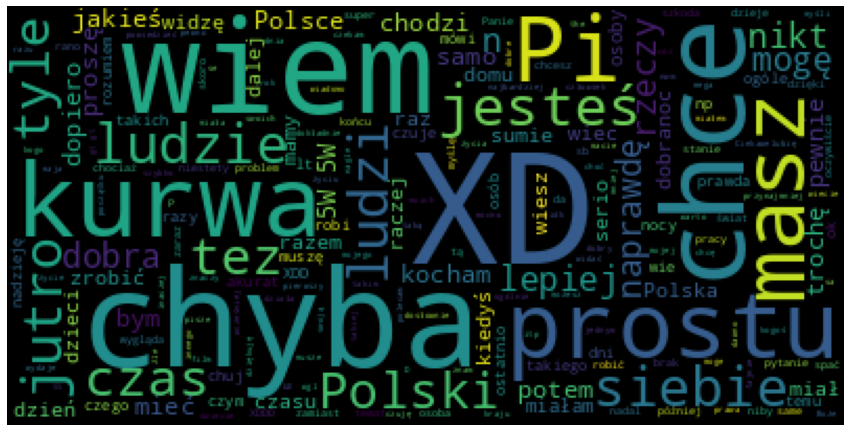

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=STOPWORDS)


def make_wordcloud(df, samples=10000):
    text = " ".join(i for i in df.sample(frac=1).text[:samples])
    cloud = wordcloud.generate(text)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


make_wordcloud(twitter_df)

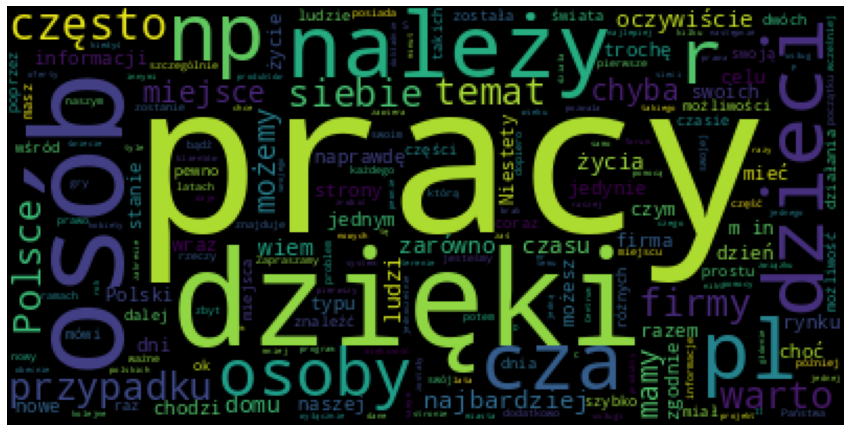

In [18]:
make_wordcloud(full_df)

In [ ]:
# import spacy
# import seaborn as sns
#
# nlp = spacy.load("pl_core_news_md")
# df = pd.DataFrame()
# df['doc'] = [nlp(text) for text in twitter_df.text]
# df['num_tokens'] = [len(token) for token in df.doc]
#
# g = sns.histplot(df.num_tokens)


In [1]:
twitter_df

NameError: name 'twitter_df' is not defined